# **06. 토픽 모델링(Topic Modelling)- 20 뉴스그룹**

- 토픽 모델링
: 문서 집합에 숨어 있는 주제를 찾아내는 것
<br>
사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축척으로 추출

머신러닝 기반의 토픽 모델링에 자주 사용되는 기법은

1. LSA(latent semanti analytics)

2. LDA(latent dirichlet allocation)

**여기서는 LDA만 이용해 토픽 모델링 수행

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학 8개의 주제를 추출하기 위한 cats
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset = 'all', remove = ('headers', 'footers', 'quotes'),
                             categories = cats, random_state = 0)

# LDA는 Count기반의 벡터화만 사용
count_vect = CountVectorizer(max_df = 0.95, max_features = 1000, min_df = 2, stop_words = 'english',
                            ngram_range = (1, 2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape : ', feat_vect.shape)

CountVectorizer Shape :  (7862, 1000)


In [2]:
# n_components를 이용하여 토픽 개수를 조절한다
lda = LatentDirichletAllocation(n_components = 8, random_state = 0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [3]:
# LatentDirichletAllocation(데이터 세트) 수행 시 LatentDirichletAllocation 객체는 components_ 속성을 가짐
# components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치(연관도)를 가지고 있음
# 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 됨

print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

- components_는 array[8, 4000]으로 구성되어 있음
- 8개의 토픽별로 1000개의 word 피처가 해당토픽별로 연관도 값을 가지고 있음
- 즉, components_array의 0번째 row, 10번째 col에 있는 값은 Topic#0에 대해 피처 벡터화된 행렬에서 10번째 컬럼에
- 해당하는 피처가 Topic #0에 연관되는 수치값을 가지고 있음

In [4]:
# lda_model.components_ 값만으로는 각 토픽별 word 연관도를 보기 어려움
# display_topics()함수를 만들어서 각 토픽별로 연관도가 높은 순으로 Word를 나열해보자.

def display_topics(model, feature_names, no_top_words) :
    for topic_index, topic in enumerate(model.components_) :
        print('Topic #', topic_index)

        # components_array 에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]

        # top_indexes대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# CountVectorizer객체 내의 전체 word의 명칭을 get_feature_names()를 통해 추출
feature_names = count_vect.get_feature_names_out() # 1000개의 word 명칭

# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


# **07. 문서 군집화 소개와 실습(Opinion Review 데이터 세트)**

## **문서 군집화 개념**

- 문서 군집화(Document Clustering)
: 비슷한 텍스트 구성의 문서를 군집화 하는 것
- 텍스트 분류 기반의 문서 분류는 결정 카테고리 값을 가진 학습 데이터가 필요
<br>
그러나, 문서 군집화는 학습 데이터가 필요 없는 비지도학습 기반으로 동작

## **Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기**

In [5]:
import pandas as pd
import glob, os

# 디렉토리 설정
path = r'/content/topics'
# path로 지정한 디렉토리 밑에 모든 .data 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일의 파일명은 filename_list로 취합
# 개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files :
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')

    # 절대 경로로 주어진 파일명을 가공, 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename' : filename_list, 'opinion_text' : opinion_text})
document_df.head()

,filename,opinion_text
0,/content/topics/eyesight-issues_amazon_kindle,...
1,/content/topics/comfort_honda_accord_2008,...
2,/content/topics/seats_honda_accord_2008,...
3,/content/topics/rooms_swissotel_chicago,...
4,/content/topics/size_asus_netbook_1005ha,...


In [6]:
# TF-IDF 피처 벡터화 수행하기 전, tokenizer 함수를 정의
from nltk.stem import WordNetLemmatizer
import nltk
import string

# ord는 문자의 유니코드 값을 반환, string.punctuation은 구두점
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens) :
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text) :
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [10]:
import nltk

nltk.download('punkt_tab')

# Download the 'wordnet' resource
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
# TF-IDf 피처 벡터화 수행
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english',
                            ngram_range = (1, 2), min_df = 0.05, max_df = 0.85)
# opinion_text 컬럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [12]:
# K-평균 군집화 적용
from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters = 5, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_


In [13]:
document_df['cluster_label'] = cluster_label
document_df.head()


,filename,opinion_text,cluster_label
0,/content/topics/eyesight-issues_amazon_kindle,...,2
1,/content/topics/comfort_honda_accord_2008,...,3
2,/content/topics/seats_honda_accord_2008,...,3
3,/content/topics/rooms_swissotel_chicago,...,3
4,/content/topics/size_asus_netbook_1005ha,...,4


In [14]:
# cluster_label이 0인 데이터들을 정렬
document_df[document_df['cluster_label'] == 0].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
14,/content/topics/food_holiday_inn_london,...,0
32,/content/topics/food_swissotel_chicago,...,0
44,/content/topics/free_bestwestern_hotel_sfo,...,0
48,/content/topics/location_bestwestern_hotel_sfo,...,0
35,/content/topics/location_holiday_inn_london,...,0
41,/content/topics/parking_bestwestern_hotel_sfo,...,0
27,/content/topics/service_bestwestern_hotel_sfo,...,0
33,/content/topics/service_holiday_inn_london,...,0
21,/content/topics/service_swissotel_hotel_chicago,...,0
25,/content/topics/staff_bestwestern_hotel_sfo,...,0


Cluster #0은 호텔에 대한 리뷰로 군집화 되어 있음을 알 수 있다.

In [15]:
# cluster_labe이 1인 데이터들을 정렬
document_df[document_df['cluster_label'] == 1].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
31,/content/topics/features_windows7,...,1
13,/content/topics/gas_mileage_toyota_camry_2007,...,1
7,/content/topics/mileage_honda_accord_2008,...,1
38,/content/topics/performance_honda_accord_2008,...,1
30,/content/topics/performance_netbook_1005ha,...,1
45,/content/topics/satellite_garmin_nuvi_255W_gps,...,1
22,/content/topics/screen_garmin_nuvi_255W_gps,...,1
9,/content/topics/speed_garmin_nuvi_255W_gps,...,1
5,/content/topics/speed_windows7,...,1
39,/content/topics/transmission_toyota_camry_2007,...,1


Cluster #1은 킨들, 아이팟, 넷북 등의 포터블 전자기기에 대한 리뷰로 군집화 되어 있음


In [16]:
# cluster_label이 2인 데이터들을 정렬
document_df[document_df['cluster_label'] == 2].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
46,/content/topics/accuracy_garmin_nuvi_255W_gps,...,2
17,/content/topics/buttons_amazon_kindle,...,2
11,/content/topics/directions_garmin_nuvi_255W_gps,...,2
36,/content/topics/display_garmin_nuvi_255W_gps,...,2
0,/content/topics/eyesight-issues_amazon_kindle,...,2
6,/content/topics/fonts_amazon_kindle,...,2
15,/content/topics/interior_toyota_camry_2007,...,2
12,/content/topics/navigation_amazon_kindle,...,2
47,/content/topics/price_amazon_kindle,...,2
40,/content/topics/quality_toyota_camry_2007,...,2


Cluster #2는 킨들, 아이팟, 넷북이 군집에 포함되어 있지만 주로 차량용 네비게이션 리뷰


In [17]:
# cluster_label이 3인 데이터들을 정렬
document_df[document_df['cluster_label'] == 3].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
37,/content/topics/bathroom_bestwestern_hotel_sfo,...,3
1,/content/topics/comfort_honda_accord_2008,...,3
43,/content/topics/comfort_toyota_camry_2007,...,3
42,/content/topics/interior_honda_accord_2008,...,3
28,/content/topics/price_holiday_inn_london,...,3
49,/content/topics/room_holiday_inn_london,...,3
50,/content/topics/rooms_bestwestern_hotel_sfo,...,3
3,/content/topics/rooms_swissotel_chicago,...,3
2,/content/topics/seats_honda_accord_2008,...,3


Cluster #3은 킨들 리뷰가 하나 섞여있긴 하지만, 대부분 호텔에 대한 리뷰로 군집화


In [19]:
# cluster_label이 4인 데이터들을 정렬
document_df[document_df['cluster_label'] == 4].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
29,/content/topics/battery-life_amazon_kindle,...,4
24,/content/topics/battery-life_ipod_nano_8gb,...,4
23,/content/topics/battery-life_netbook_1005ha,...,4
34,/content/topics/keyboard_netbook_1005ha,...,4
8,/content/topics/screen_ipod_nano_8gb,...,4
20,/content/topics/screen_netbook_1005ha,...,4
4,/content/topics/size_asus_netbook_1005ha,...,4


Cluster #4는 토요타와 혼다 등의 자동차에 대한 리뷰로 군집화

>위 경우, 군집 개수가 많게 설정되어 있어 세분화되어 군집화된 경향이 있음

>중심개수를 5개에서 3개로 낮추어보자.

In [20]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# 소속 군집을 cluster_label 컬럼으로 할당
document_df['cluster_label'] = cluster_label

In [21]:
# Cluster 0
document_df[document_df['cluster_label'] == 0].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
37,/content/topics/bathroom_bestwestern_hotel_sfo,...,0
14,/content/topics/food_holiday_inn_london,...,0
32,/content/topics/food_swissotel_chicago,...,0
44,/content/topics/free_bestwestern_hotel_sfo,...,0
48,/content/topics/location_bestwestern_hotel_sfo,...,0
35,/content/topics/location_holiday_inn_london,...,0
41,/content/topics/parking_bestwestern_hotel_sfo,...,0
28,/content/topics/price_holiday_inn_london,...,0
49,/content/topics/room_holiday_inn_london,...,0
50,/content/topics/rooms_bestwestern_hotel_sfo,...,0


Cluster #0은 포터블 전자기기에 대한 리뷰로 잘 군집화 되어있음

In [22]:
# Cluster 1
document_df[document_df['cluster_label'] == 1].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
46,/content/topics/accuracy_garmin_nuvi_255W_gps,...,1
29,/content/topics/battery-life_amazon_kindle,...,1
24,/content/topics/battery-life_ipod_nano_8gb,...,1
23,/content/topics/battery-life_netbook_1005ha,...,1
1,/content/topics/comfort_honda_accord_2008,...,1
43,/content/topics/comfort_toyota_camry_2007,...,1
31,/content/topics/features_windows7,...,1
13,/content/topics/gas_mileage_toyota_camry_2007,...,1
34,/content/topics/keyboard_netbook_1005ha,...,1
7,/content/topics/mileage_honda_accord_2008,...,1


Cluster #1은 차에 대한 리뷰로 잘 군집화 되어있음

In [23]:
# Cluster 2
document_df[document_df['cluster_label'] == 2].sort_values(by = 'filename')

,filename,opinion_text,cluster_label
17,/content/topics/buttons_amazon_kindle,...,2
11,/content/topics/directions_garmin_nuvi_255W_gps,...,2
36,/content/topics/display_garmin_nuvi_255W_gps,...,2
0,/content/topics/eyesight-issues_amazon_kindle,...,2
6,/content/topics/fonts_amazon_kindle,...,2
42,/content/topics/interior_honda_accord_2008,...,2
15,/content/topics/interior_toyota_camry_2007,...,2
12,/content/topics/navigation_amazon_kindle,...,2
47,/content/topics/price_amazon_kindle,...,2
40,/content/topics/quality_toyota_camry_2007,...,2


Cluster #2는 호텔에 대한 리뷰로 잘 군집화 되어있음

## **군집별 핵심 단어 추출하기**

- 각 군집(Cluster)에 속한 문서는 핵심 단어를 주축으로 군집화돼 있을 것
- KMeans는 각 군집을 구성하는 단어 피처가 군집의 중심(Centroid)을 기준으로 얼마나 가깝게 위치해 있는지 cluster_centers_라는 속성으로 제공 (ndarry 형태)
- cluster_centers_는 배열 값으로 제공되며 행은 개별 군집, 열은 개별 피처
- cluster_centers_[0, 1]은 0번 군집에서 두 번째 피처의 위치 값

In [24]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape : ', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape :  (3, 4610)
[[0.         0.00099548 0.00174656 ... 0.         0.00183397 0.00144581]
 [0.00921374 0.00044072 0.         ... 0.00498937 0.         0.        ]
 [0.00413385 0.         0.         ... 0.00512823 0.         0.        ]]


> cluster_centers_는 (3, 2409) 배열임. 군집이 3개, word 피처가 2409개로 구성되었음을 의미

> 0에서 1까지의 값을 가지며, 1에 가까울수록 중심과 가까운 값을 의미

In [25]:
# 1) cluster_centers_ 배열 내에서 가장 값이 큰 데이터의 위치 인덱스를 추출
# 2) 해당 인덱스를 이용해, 핵심 단어 이름과 그때의 상대 위치 추출
# 3) cluster_details라는 Dict 객체 변수에 기록하고 반환
# 위와 같은 동작을 수행하는 함수 get_cluster_details()의 구현

# 군집별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함.
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features = 10) :
    cluster_details = {}

    # cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:, ::-1]

    # 개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
    for cluster_num in range(clusters_num) :
        # 개별 군집별 정보를 담을 데이터 초기화.
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num

        # cluster_centers_.argsort()[:,::-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [feature_names[ind] for ind in top_feature_indexes]

        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함.
        top_feature_values = cluster_model.cluster_centers_[cluster_num,
                                                           top_feature_indexes].tolist()

        # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상대값, 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()

        cluster_details[cluster_num]['filenames'] = filenames

    return cluster_details

In [26]:
# 보기좋게 print 하기 위한 함수 구현

def print_cluster_details(cluster_details) :
    for cluster_num, cluster_detail in cluster_details.items() :
        print('###### Cluster {0}'.format(cluster_num))
        print('Top features : ', cluster_detail['top_features'])
        print('Reviews 파일명 : ', cluster_detail['filenames'][:7])
        print('==============================================')

In [28]:
# 함수 사용
# feature_names = tfidf_vect.get_feature_names()  # Replace this line
feature_names = tfidf_vect.get_feature_names_out() # Use get_feature_names_out() instead

cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,
                                     feature_names=feature_names, clusters_num=3, top_n_features=10)
print_cluster_details(cluster_details)

###### Cluster 0
Top features :  ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 :  ['/content/topics/rooms_swissotel_chicago', '/content/topics/food_holiday_inn_london', '/content/topics/staff_swissotel_chicago', '/content/topics/service_swissotel_hotel_chicago', '/content/topics/staff_bestwestern_hotel_sfo', '/content/topics/service_bestwestern_hotel_sfo', '/content/topics/price_holiday_inn_london']
###### Cluster 1
Top features :  ['battery', 'screen', 'performance', 'seat', 'mileage', 'battery life', 'keyboard', 'life', 'comfortable', 'gas']
Reviews 파일명 :  ['/content/topics/comfort_honda_accord_2008', '/content/topics/seats_honda_accord_2008', '/content/topics/size_asus_netbook_1005ha', '/content/topics/speed_windows7', '/content/topics/mileage_honda_accord_2008', '/content/topics/speed_garmin_nuvi_255W_gps', '/content/topics/gas_mileage_toyota_camry_2007']
###### Cluster 2
Top features :  ['interior', 'screen', 'kindle

# **08. 문서 유사도**

## **문서 유사도 측정 방법- 코사인 유사도**

코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반

즉, 코사인 유사도는 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것

## **두 벡터 사잇각**

> 코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유

 - 문서를 피처벡터화 하면, 차원이 매우 많은 희소 행렬이 되기 쉽다.
- 이때 문서와 문서 벡터간의 크기에 기반한 유사도 지표(유클리드 거리)는 정확도가 떨어지기 쉽다.
  <br>또한, 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기에 이러한 빈도수 기반의 유사도 비교는 공정하지 않다.
  <br> 예를 들어, A 문서에서 '머신러닝'이라는 단어가 5번 언급되고 B 문서에서 '머신러닝'이라는 단어가 3번 언급되었다고 할 때 A 문서가 '머신러닝'에 더 밀접하게 관련된 문서라고 판단하면 안된다.
  <br> A 문서의 크기가 B 문서에 비해 10배 더 크면 오히려 B 문서가 '머신러닝'에 더 밀접히 관련된 문서라고 할 수 있다.

In [29]:
# 서로 간의 문서 유사도를 코사인 유사도 기반으로 구하기
# 두개의 넘파이 배열에 대한 코사인 유사도를 구하는 cos_similarity()함수 작성
import numpy as np

def cos_similarity(v1, v2) :
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

In [30]:
# doc_list로 정의된 3개의 간단한 문서의 유사도 비교하기
# TF-IDF로 벡터화

from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
           'if you take the red pill, you stay in Wonderland',
           'if you take the red pill, I show you how deep the rabbit hold goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [33]:
# 반환된 행렬은 희소 행렬.
# 밀집 행렬로 변환한 뒤 유사도 측정

# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환.
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도 : 0.402


In [34]:
# 첫 번째 문장과 세 번째 문장, 두 번째 문장과 세 번째 문장의 유사도 측정
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도 : 0.404
문장 2, 문장 3 Cosine 유사도 : 0.456


In [35]:
# 사이킷런의 cosine_similarity() API는 코사인 유사도를 지원
# 첫 번째 파라미터는 비교의 기준이 되는 문서의 피처 행렬
# 두 번째 파라미터는 비교되는 문서의 피처 행렬
# cosine_similarity()는 희소 행렬, 밀집 행렬 모두 가능하며 행렬 또는 배열 모두 가능.

from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)


[[1.         0.40207758 0.40425045]]


## **Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

In [36]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 디렉토리 설정
path = r'/content/topics'

# path로 지정한 디렉토리 밑에 모든 .data 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일의 파일명은 filename_list로 취합
# 개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files :
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')

    # 절대 경로로 주어진 파일명을 가공, 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]

    # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename' : filename_list, 'opinion_text' : opinion_text})

In [37]:
# TF-IDF 피처 벡터화 수행하기 전, tokenizer 함수를 정의
from nltk.stem import WordNetLemmatizer
import nltk
import string

# ord는 문자의 유니코드 값을 반환, string.punctuation은 구두점
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens) :
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text) :
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [38]:
tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english',
                            ngram_range = (1, 2), min_df = 0.05, max_df = 0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [39]:
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [40]:
# 호텔을 주제로 군집화된 데이터 먼저 추출
# 이후, 이 데이터에 해당하는 TFidfVectorizer의 데이터를 추출

from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 2인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스 추출
hotel_indexes = document_df[document_df['cluster_label'] == 2].index
print('호텔로 군집화 된 문서들의 DataFrame Index : ', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도 #####')

'''
document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서간의 코사인 유사도 측정
'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index :  Index([0, 6, 8, 10, 11, 12, 15, 17, 18, 26, 36, 40, 42, 47], dtype='int64')
##### 비교 기준 문서명 /content/topics/eyesight-issues_amazon_kindle 와 타 문서 유사도 #####
[[1.         0.41437874 0.1545117  0.0530008  0.04243068 0.26345628
  0.02312259 0.15570081 0.03407677 0.02568501 0.08214345 0.01202774
  0.02162968 0.20063293]]


Text(0.5, 1.0, '/content/topics/eyesight-issues_amazon_kindle')

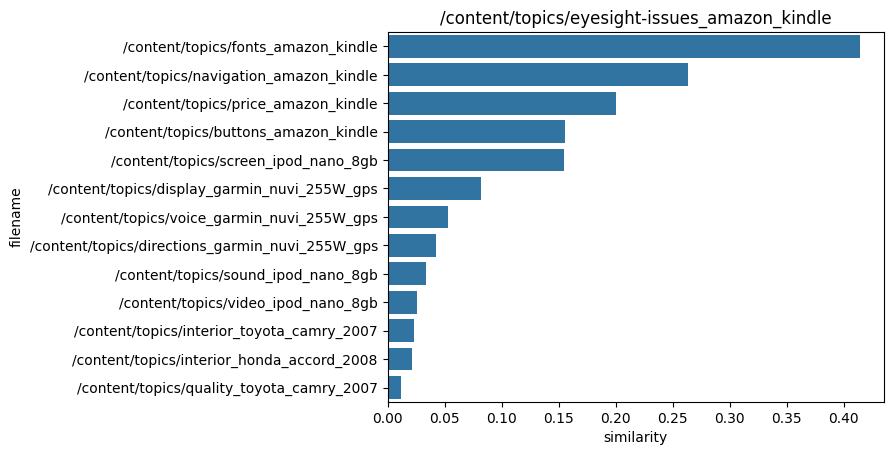

In [41]:
# 첫 번쨰 문서와 다른 문서 간에 유사도가 높은 순으로 정렬하고 시각화
# cosine_similarity()는 쌍 형태의 ndarray를 반환하므로 판닥스 인덱스로 이용하기 위해
# reshape(-1)로 차원 변경

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x = 'similarity', y = 'filename', data = hotel_1_sim_df)
plt.title(comparison_docname)

# **09. 한글 텍스트 처리- 네이버 영화 평점 감성 분석**

## **한글 NLP처리의 어려움**

> 어려운 이유

1. 띄어쓰기를 틀리는 경우가 자주 발생
2. 다양한 형태의 조사 존재

## **KoNLPy 소개**

: 파이썬의 대표적인 한글 형태소 패키지
- 형태소 : 단어로서 의미를 가지는 최소 단위
- 형태소 분석 : 말뭉치를 형태소 어근 단위로 쪼개고, 각 형태소에 품사태깅을 부착하는 작업

In [50]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,517 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,631 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,226 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,448 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,563 kB]
Hit:13 https://ppa.launchpadcontent.net/deadsnakes

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
E: Package 'python-dev' has no installation candidate


In [51]:
# JAVA_HOME 환경변수 설정하기

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [52]:
# Kkma 사용해보기 from konlpy

from konlpy.tag import Kkma
kkma=Kkma()

# 형태소
print("kkma.porphs : ", kkma.morphs('안녕하세요. 저는 딥러닝 입니다.'))

# 명사
print("kkma.nouns : ", kkma.nouns('안녕하세요. 저는 딥러닝 입니다.'))

# 형태소 + 품사
print("kkma.pos : ", kkma.pos('안녕하세요. 저는 딥러닝 입니다.'))

kkma.porphs :  ['안녕', '하', '세요', '.', '저', '는', '딥', '러닝', '이', 'ㅂ니다', '.']
kkma.nouns :  ['안녕', '저', '딥', '딥러닝', '러닝']
kkma.pos :  [('안녕', 'NNG'), ('하', 'XSV'), ('세요', 'EFN'), ('.', 'SF'), ('저', 'NP'), ('는', 'JX'), ('딥', 'NNG'), ('러닝', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


## **데이터 로딩**

In [43]:
import pandas as pd


train_df = pd.read_csv('/content/ratings_train.txt', sep = '\t')
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [45]:
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


In [46]:
train_df['document'].isnull().sum()

5

In [48]:
# document 컬럼에 Null이 존재하므로 이를 공백으로 변환
# 문자가 아닌 숫자의 경우 단어적 의미가 부족하므로 파이썬의 정규 표현인 모듈인
# re를 이용해 공백으로 변환
import re

train_df = train_df.fillna(' ')

# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r"\d+", " ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/ratings_train.txt', sep = '\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r"\d+", " ", x))

# id 컬럼 상제 수행
train_df.drop('id', axis = 1, inplace = True)
test_df.drop('id', axis = 1, inplace = True)

In [53]:
# TF-IDF 방식으로 벡터화 진행, 형태소 단어로 토큰화 필요
# 한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스 이용
# Twitter 객체의 morphs()메소드를 이용하면
# 문장(입력) -> 형태소 단위로 토큰화한 리스트(출력)

from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text) :
    # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram-range는 (1, 2)
tfidf_vect = TfidfVectorizer(tokenizer = tw_tokenizer, ngram_range = (1, 2), min_df = 3, max_df = 0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

In [59]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state = 0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C' : [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid = params, cv = 3,
                      scoring = 'accuracy', verbose = 1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 3.5} 0.8596


In [60]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# Classfier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도 : ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도 :  0.9383066666666666
